## Perceptrón

El perceptrón es el caso más simple de una Red Neuronal Artificial (RNA), sólo cuenta con una única neurona y por lo tanto una sola salida. Este admite un número no restringido de entradas.

Como primer ejercicio, simular compuerta logica AND


|x1 |x2 |y|
|:-:|:-:|-|
| 0 | 0 |0|
| 0 | 1 |0|
| 1 | 0 |0|
| 1 | 1 |1|


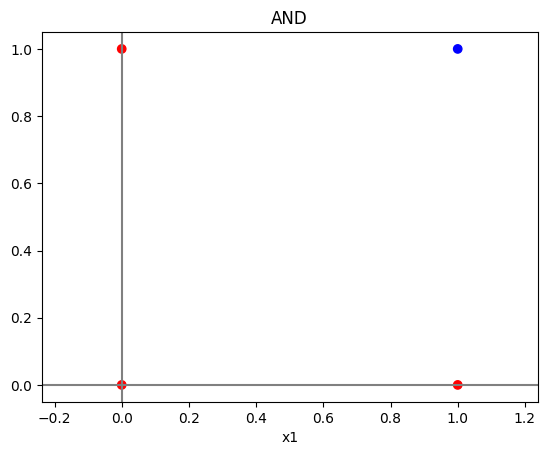

In [1]:
import matplotlib.pyplot as plt
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]

y = [0, 0, 0, 1]

colors = ['blue' if i == 1 else 'red' for i in y]

plt.title('AND')
plt.axhline(color = 'grey')
plt.axvline(color = 'grey')
plt.xlabel('x2')
plt.xlabel('x1')
plt.axis('equal')
plt.scatter(x2, x1, color = colors)

### Funcion de activación de escalón

$$ y = f(n) = \begin {cases} 0, &\text {Si $n<0$} \\ 1, &\text {Si $n \geq 0$}
\end{cases} $$

In [5]:
def funcion_de_activacion(n):
    return 0 if n < 0 else 1

def salida_del_perceptron(x1, w1,x2, w2, b):
    Y = []

    for i in range(0, 4):
        n = x1[i] + w1 + x2[i] * w2 + b
        Y.append(funcion_de_activacion(n))
    return Y


## Probando valores para los pesos y el sesgo

In [6]:
w1 = 1
w2 = 1
b = 1

Y = salida_del_perceptron(x1, w1, x2, w2, b)

print(Y)

[1, 1, 1, 1]


## Entrenamiento

Actualizacion de los pesos: $ w = w + a (y - Y) * x $

Actualización del bias: $ b = b + a * (y - Y) $

Algoritmo:
1. Obtener la salida del perceptrón
2. Si el error es diferente de 0, actualizar pesos y bias, repetir el paso 1
3. Repetir para todas las entradas

In [9]:
import numpy as np

def perceptron(W1, W2, B):
    X1 = np.linspace(-2, 2, 10)
    X2 = (- X1 * W1 - B) /W2

    XX1, XX2 = np.meshgrid(X1, X1)
    Z = XX1 * W1 + XX2 * W2 + B

    Y = salida_del_perceptron(x1, W1, x2, W2, B)

    plt.title(f'Perceptron = {Y}')
    plt.axhline(color = 'grey')
    plt.axvline(color = 'grey')
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('x2')
    plt.ylabel('x1')
    plt.contour(XX1, XX2, Z, levels = [Z.min(), 0, Z.max()],
                colors = ['red', 'blue'], alpha = 0.2)
    plt.plot(x1, x2, '--', color = 'black')
    plt.scatter(x2, x1, color = colors)

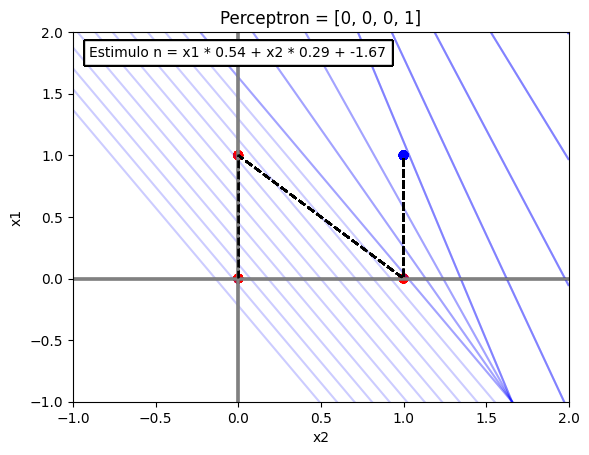

In [10]:
from IPython.display import clear_output
import random

i = 0
aprendizaje = 0.1

w1 = random.random()
w2 = random.random()
b = random.random()

while i < 4:
    Y = salida_del_perceptron(x1, w1, x2, w2, b)
    error = y[i] - Y[i]

    if error != 0:
        w1 = w1 + aprendizaje * error * x1[i]
        w2 = w2 + aprendizaje * error * x2[i]
        b = b + aprendizaje * error

        i = 0
    else:
        i += 1

    clear_output(wait = True)

    perceptron(w1, w2, b)
    plt.text(-0.9, 1.8, f'Estimulo n = x1 * {w1:.2f} + x2 * {w2:.2f} + {b:.2f}', bbox = dict(facecolor = 'white'))